In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.options.display.min_rows = 121

In [256]:
df = pd.read_csv('application_data.csv')

In [257]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [258]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [260]:
df.drop(['SK_ID_CURR'], axis = 1, inplace = True)

In [261]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['TARGET']==0)] 
df_minority = df[(df['TARGET']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 307510, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

In [262]:
X = df.drop(['TARGET'], axis = 1)
Y = df[['TARGET']]

<AxesSubplot:xlabel='TARGET', ylabel='count'>

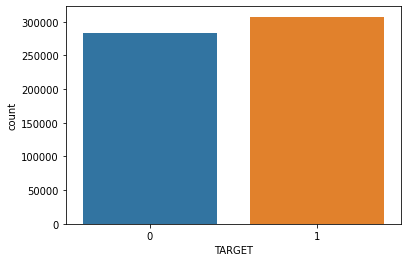

In [263]:
sns.countplot(Y['TARGET'])

In [264]:
for col in X.columns:
    if X[col].isnull().mean()>0.2:
        X.drop([col], axis = 1, inplace = True)
        print(col)
    else:
        pass

OWN_CAR_AGE
OCCUPATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [265]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590196 entries, 292662 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           590196 non-null  object 
 1   CODE_GENDER                  590196 non-null  object 
 2   FLAG_OWN_CAR                 590196 non-null  object 
 3   FLAG_OWN_REALTY              590196 non-null  object 
 4   CNT_CHILDREN                 590196 non-null  int64  
 5   AMT_INCOME_TOTAL             590196 non-null  float64
 6   AMT_CREDIT                   590196 non-null  float64
 7   AMT_ANNUITY                  590184 non-null  float64
 8   AMT_GOODS_PRICE              589689 non-null  float64
 9   NAME_TYPE_SUITE              588089 non-null  object 
 10  NAME_INCOME_TYPE             590196 non-null  object 
 11  NAME_EDUCATION_TYPE          590196 non-null  object 
 12  NAME_FAMILY_STATUS           590196 non-null  object 

In [266]:
X.isnull().mean()

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000020
AMT_GOODS_PRICE                0.000859
NAME_TYPE_SUITE                0.003570
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [267]:
num = X.select_dtypes(include=['number'])
char = X.select_dtypes(include=['object'])

In [268]:
num.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT

In [269]:
char.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [270]:
num.index

Int64Index([292662, 194394,  11104,  66953, 266717, 146590, 138743, 273174,
             77935, 207551,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
            307508, 307510],
           dtype='int64', length=590196)

In [271]:
char.index

Int64Index([292662, 194394,  11104,  66953, 266717, 146590, 138743, 273174,
             77935, 207551,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
            307508, 307510],
           dtype='int64', length=590196)

In [272]:
Y.index

Int64Index([292662, 194394,  11104,  66953, 266717, 146590, 138743, 273174,
             77935, 207551,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
            307508, 307510],
           dtype='int64', length=590196)

In [273]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
292662,0,108000.0,213322.5,15651.0,162000.0,0.020713,-17027,-1605,-7519.0,-575,1,1,0,1,0,0,2.0,3,2,8,0,0,0,0,0,0,0.286765,1.0,0.0,1.0,0.0,-565.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
194394,1,99000.0,450000.0,35685.0,450000.0,0.014520,-11818,-529,-5330.0,-3460,1,1,0,1,0,0,3.0,2,2,10,0,0,0,0,1,1,0.038079,0.0,0.0,0.0,0.0,-578.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11104,1,270000.0,1206954.0,31968.0,945000.0,0.046220,-9418,-981,-6695.0,-2092,1,1,0,1,0,0,2.0,1,1,16,0,0,0,0,0,0,0.610431,0.0,0.0,0.0,0.0,-6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
66953,2,270000.0,521280.0,31630.5,450000.0,0.025164,-12239,-4214,-5326.0,-4459,1,1,0,1,0,0,4.0,2,2,11,0,0,0,0,0,0,0.461949,3.0,0.0,2.0,0.0,-820.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
266717,0,225000.0,454500.0,16825.5,454500.0,0.014520,-11081,-591,-3450.0,-1009,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.265457,0.0,0.0,0.0,0.0,-265.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [274]:
num.reset_index(inplace = True, drop = True)
char.reset_index(inplace = True, drop = True)
Y.reset_index(inplace = True, drop = True)

In [275]:
num.index

RangeIndex(start=0, stop=590196, step=1)

In [276]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,108000.0,213322.5,15651.0,162000.0,0.020713,-17027,-1605,-7519.0,-575,1,1,0,1,0,0,2.0,3,2,8,0,0,0,0,0,0,0.286765,1.0,0.0,1.0,0.0,-565.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
1,1,99000.0,450000.0,35685.0,450000.0,0.014520,-11818,-529,-5330.0,-3460,1,1,0,1,0,0,3.0,2,2,10,0,0,0,0,1,1,0.038079,0.0,0.0,0.0,0.0,-578.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,270000.0,1206954.0,31968.0,945000.0,0.046220,-9418,-981,-6695.0,-2092,1,1,0,1,0,0,2.0,1,1,16,0,0,0,0,0,0,0.610431,0.0,0.0,0.0,0.0,-6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,270000.0,521280.0,31630.5,450000.0,0.025164,-12239,-4214,-5326.0,-4459,1,1,0,1,0,0,4.0,2,2,11,0,0,0,0,0,0,0.461949,3.0,0.0,2.0,0.0,-820.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,225000.0,454500.0,16825.5,454500.0,0.014520,-11081,-591,-3450.0,-1009,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.265457,0.0,0.0,0.0,0.0,-265.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [277]:
char.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Municipal apartment,WEDNESDAY,Other
1,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,With parents,THURSDAY,Business Entity Type 3
2,Cash loans,F,N,N,NaN,Commercial associate,Secondary / secondary special,Single / not married,With parents,WEDNESDAY,Medicine
3,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Self-employed
4,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Civil marriage,Rented apartment,FRIDAY,Bank


In [278]:
Y.head()

,TARGET
0,1
1,1
2,1
3,1
4,1


In [279]:
Y.reset_index(drop = True)

,TARGET
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [280]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,108000.0,213322.5,15651.0,162000.0,0.020713,-17027,-1605,-7519.0,-575,1,1,0,1,0,0,2.0,3,2,8,0,0,0,0,0,0,0.286765,1.0,0.0,1.0,0.0,-565.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
1,1,99000.0,450000.0,35685.0,450000.0,0.014520,-11818,-529,-5330.0,-3460,1,1,0,1,0,0,3.0,2,2,10,0,0,0,0,1,1,0.038079,0.0,0.0,0.0,0.0,-578.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,270000.0,1206954.0,31968.0,945000.0,0.046220,-9418,-981,-6695.0,-2092,1,1,0,1,0,0,2.0,1,1,16,0,0,0,0,0,0,0.610431,0.0,0.0,0.0,0.0,-6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,270000.0,521280.0,31630.5,450000.0,0.025164,-12239,-4214,-5326.0,-4459,1,1,0,1,0,0,4.0,2,2,11,0,0,0,0,0,0,0.461949,3.0,0.0,2.0,0.0,-820.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,225000.0,454500.0,16825.5,454500.0,0.014520,-11081,-591,-3450.0,-1009,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.265457,0.0,0.0,0.0,0.0,-265.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [281]:
for col in num.columns:
    if num[col].value_counts().count()<10:
        char.insert(0,col,num[col])
        del num[col]

In [282]:
num.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [283]:
char.columns

Index(['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN

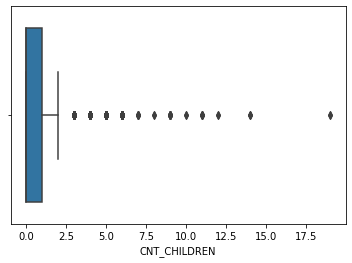

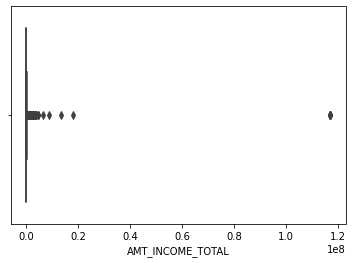

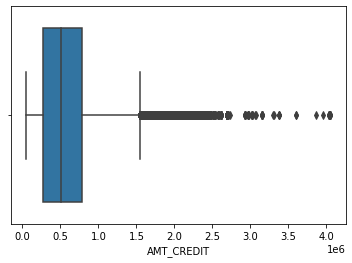

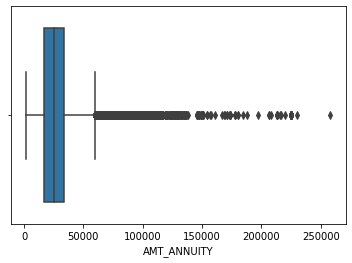

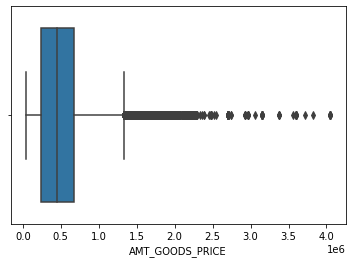

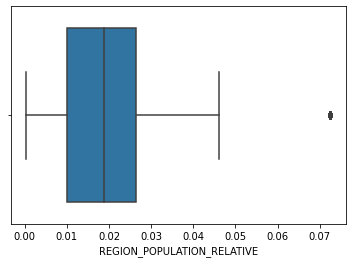

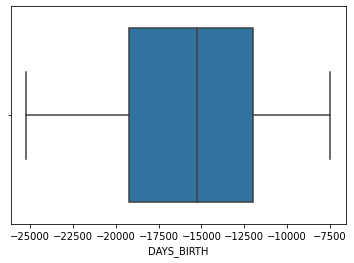

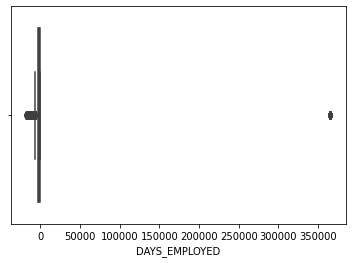

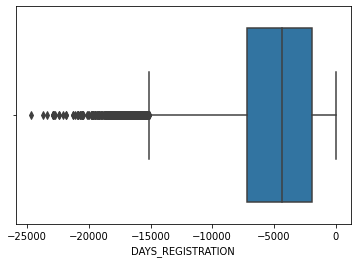

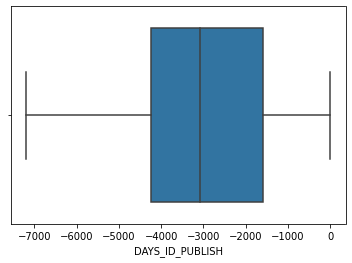

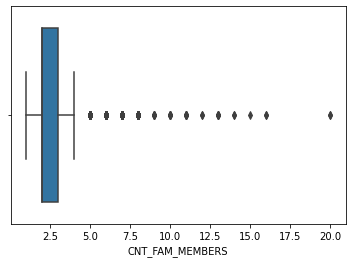

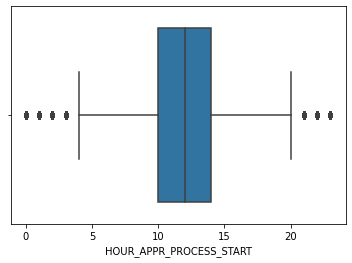

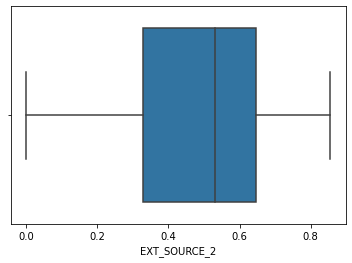

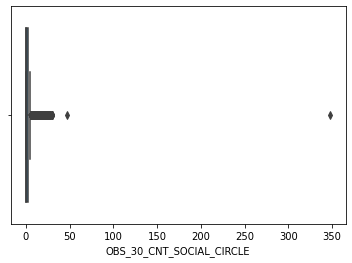

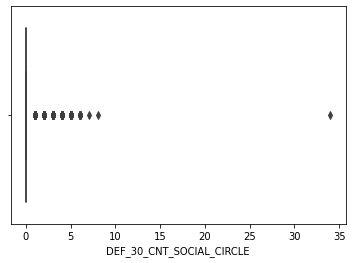

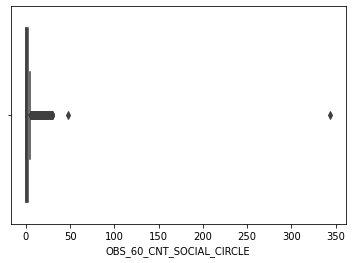

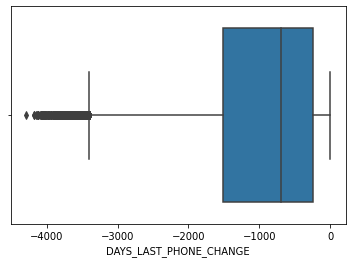

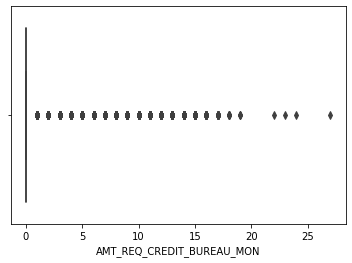

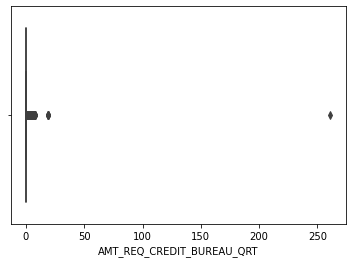

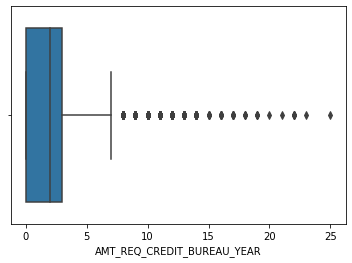

In [130]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [284]:
for i in num.columns:
    q1 = num[i].quantile(0.25)
    q3 = num[i].quantile(0.75)
    iqr = q3-q1
    l1 = q1 - iqr*1.5
    u1 = q3 + iqr*1.5
    num[i] = np.where(num[i]>u1,np.nan,num[i])
    num[i] = np.where(num[i]<l1,np.nan,num[i])

In [285]:
num.isnull().mean()

CNT_CHILDREN                  0.015595
AMT_INCOME_TOTAL              0.039563
AMT_CREDIT                    0.024107
AMT_ANNUITY                   0.021854
AMT_GOODS_PRICE               0.037845
REGION_POPULATION_RELATIVE    0.020651
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.208487
DAYS_REGISTRATION             0.003158
DAYS_ID_PUBLISH               0.000000
CNT_FAM_MEMBERS               0.014570
HOUR_APPR_PROCESS_START       0.007669
EXT_SOURCE_2                  0.002133
OBS_30_CNT_SOCIAL_CIRCLE      0.070190
DEF_30_CNT_SOCIAL_CIRCLE      0.133303
OBS_60_CNT_SOCIAL_CIRCLE      0.068670
DAYS_LAST_PHONE_CHANGE        0.002991
AMT_REQ_CREDIT_BUREAU_MON     0.289643
AMT_REQ_CREDIT_BUREAU_QRT     0.309268
AMT_REQ_CREDIT_BUREAU_YEAR    0.165138
dtype: float64

In [286]:
for col in num.columns:
    num[col].fillna(num[col].median(), inplace = True)

In [287]:
num.isnull().mean()

CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
CNT_FAM_MEMBERS               0.0
HOUR_APPR_PROCESS_START       0.0
EXT_SOURCE_2                  0.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
DAYS_LAST_PHONE_CHANGE        0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

In [288]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

In [289]:
num_binned.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,2.0,1.0,2.0,0.0,6.0,3.0,3.0,2.0,9.0,1.0,1.0,2.0,1.0,0.0,1.0,5.0,0.0,0.0,4.0
1,1.0,2.0,4.0,8.0,5.0,3.0,7.0,6.0,3.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
2,1.0,8.0,9.0,7.0,9.0,9.0,9.0,4.0,2.0,6.0,1.0,9.0,6.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
3,1.0,8.0,5.0,7.0,5.0,7.0,7.0,0.0,3.0,1.0,2.0,4.0,4.0,3.0,0.0,2.0,4.0,0.0,0.0,3.0
4,0.0,8.0,4.0,2.0,6.0,3.0,8.0,6.0,5.0,8.0,1.0,7.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,4.0


In [290]:
num_binned.index

RangeIndex(start=0, stop=590196, step=1)

In [291]:
Y.index

RangeIndex(start=0, stop=590196, step=1)

In [201]:
Y.reset_index(inplace = True)

In [292]:
Y.index

RangeIndex(start=0, stop=590196, step=1)

In [293]:
num_binned_Y = pd.concat([num_binned,Y], axis = 1)

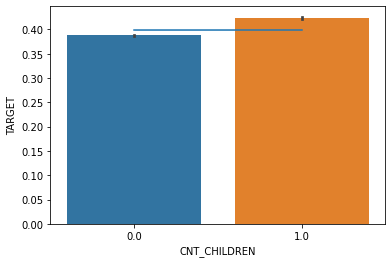

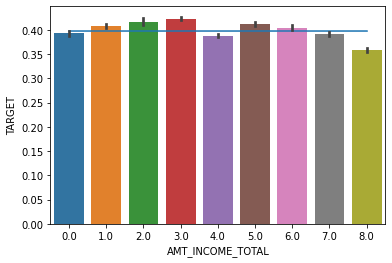

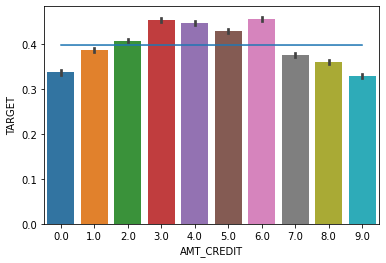

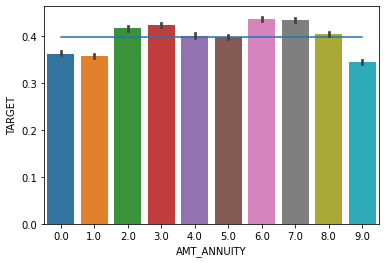

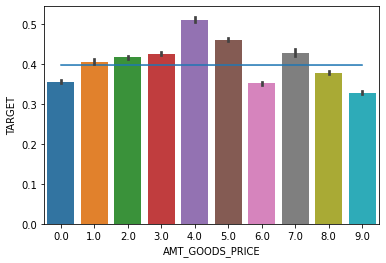

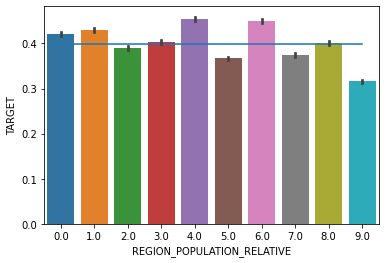

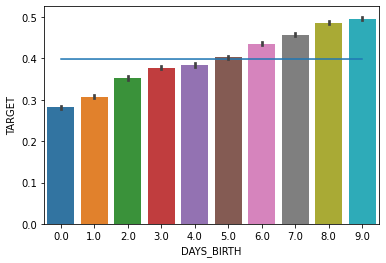

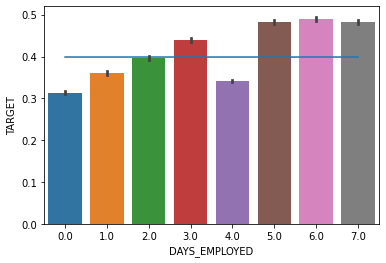

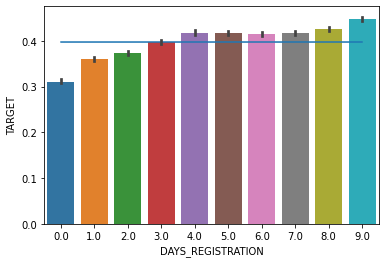

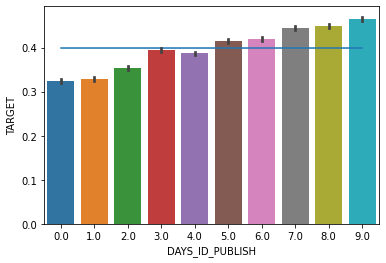

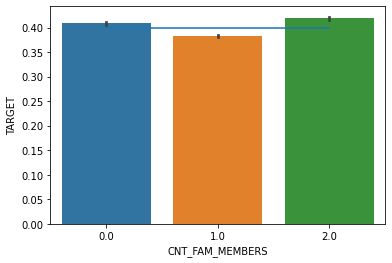

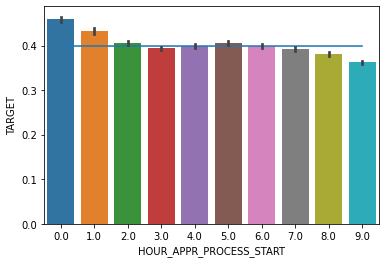

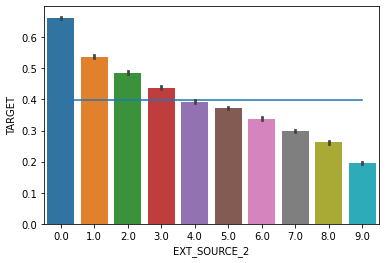

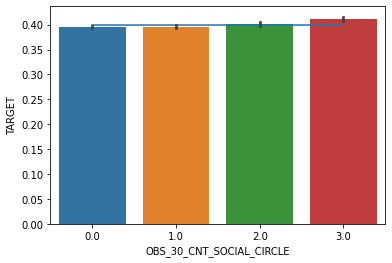

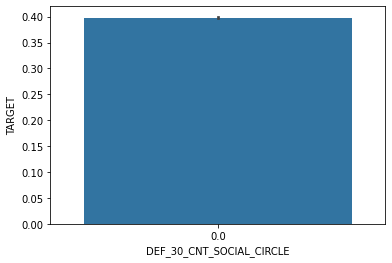

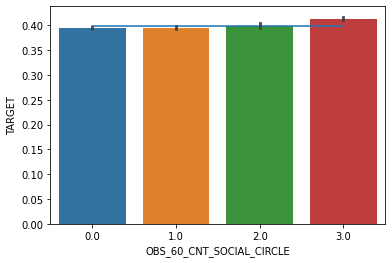

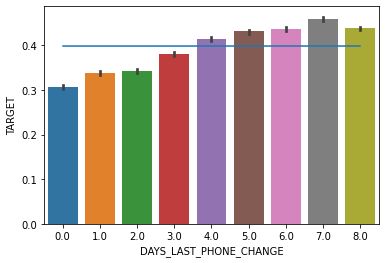

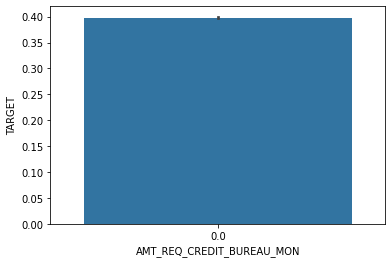

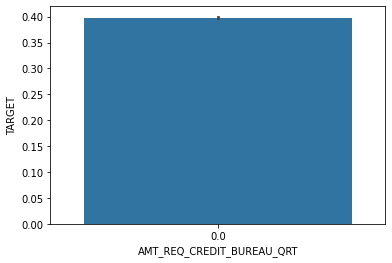

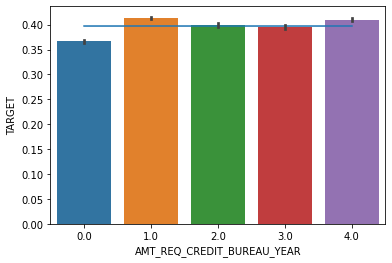

In [145]:
for col in num_binned.columns:
    plt.figure()
    sns.lineplot(x = col, y = Y['TARGET'].mean(), data = num_binned_Y)
    sns.barplot(x = col, y = "TARGET", data = num_binned_Y)

In [294]:
num.drop(['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
         'OBS_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS'], axis = 1, inplace = True)

In [295]:
num.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [296]:
char.reset_index(inplace=True)

In [297]:
char.index

RangeIndex(start=0, stop=590196, step=1)

In [298]:
Y.index

RangeIndex(start=0, stop=590196, step=1)

In [299]:
char_Y = pd.concat([char,Y], axis = 1)

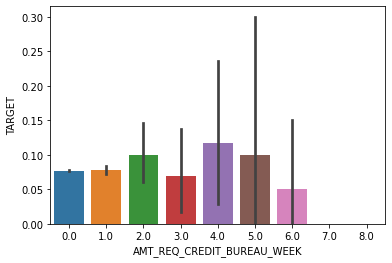

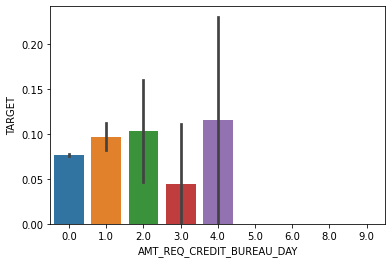

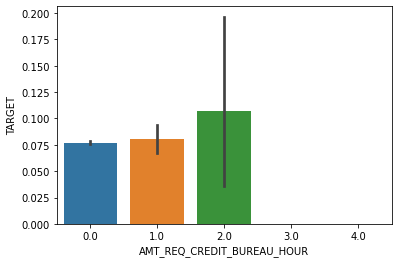

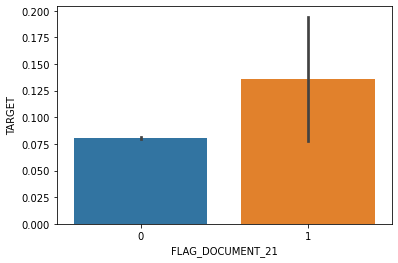

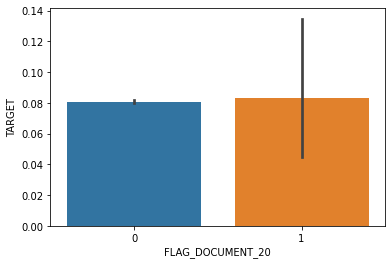

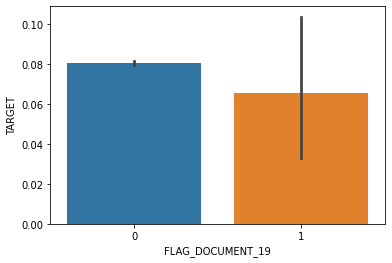

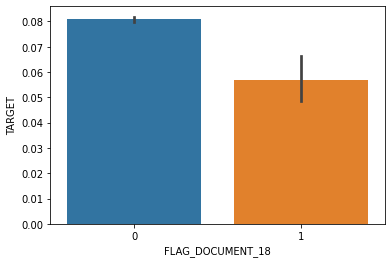

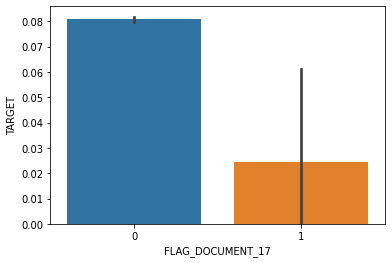

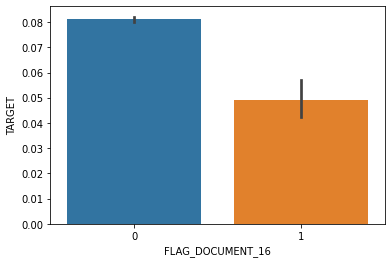

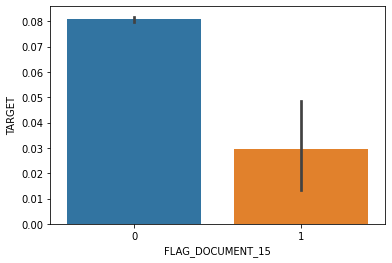

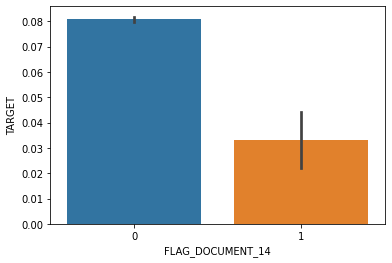

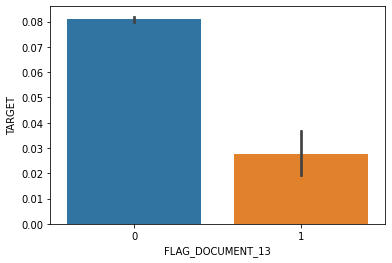

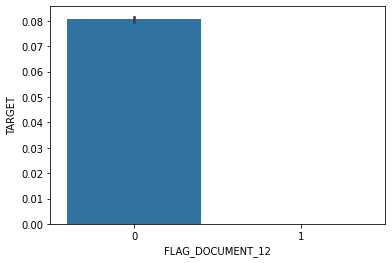

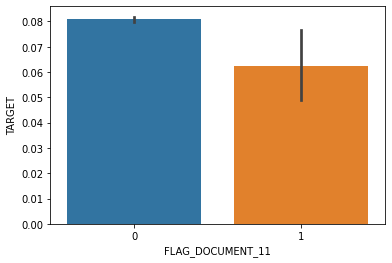

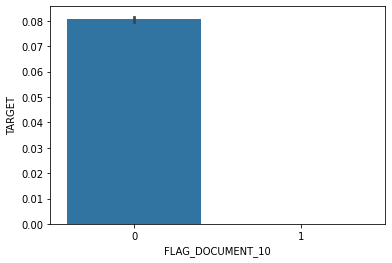

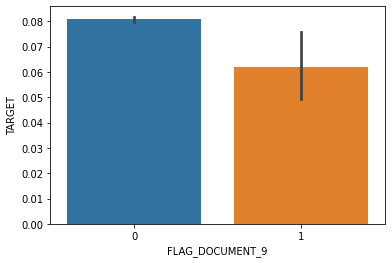

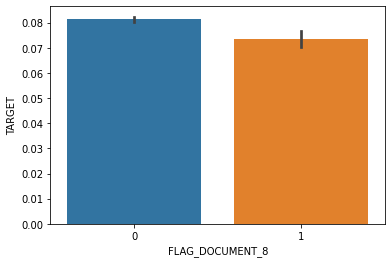

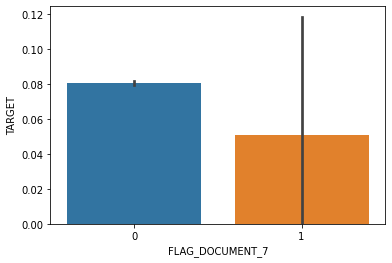

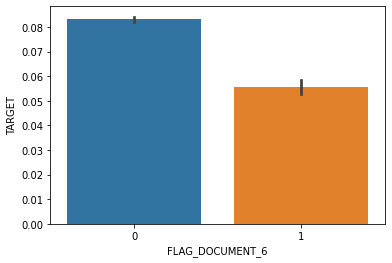

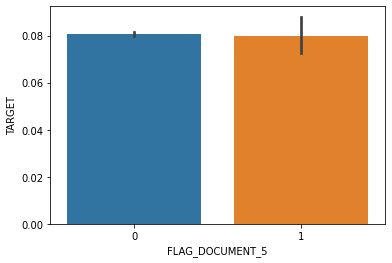

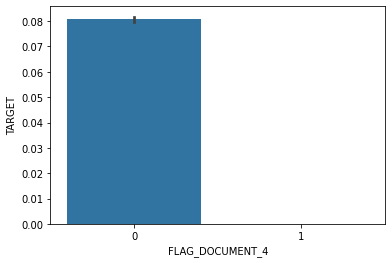

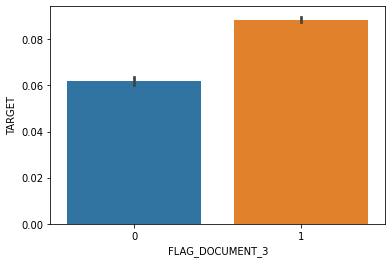

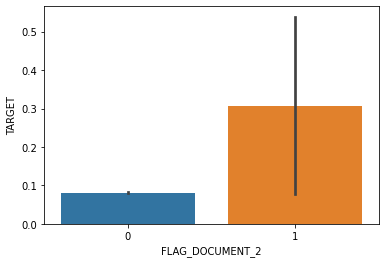

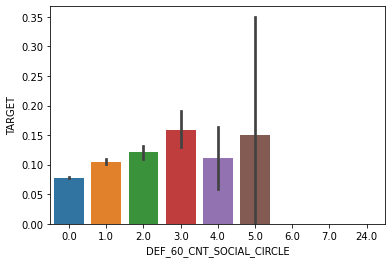

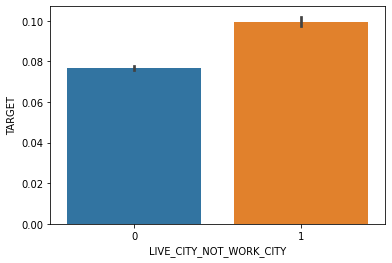

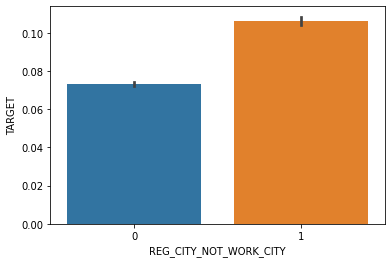

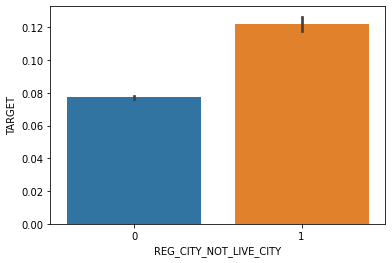

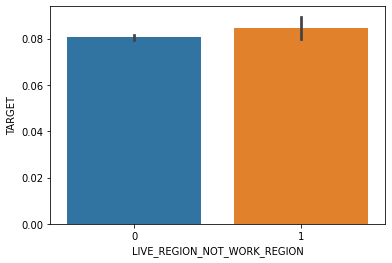

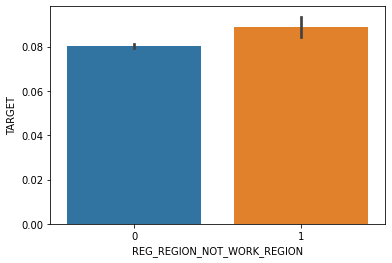

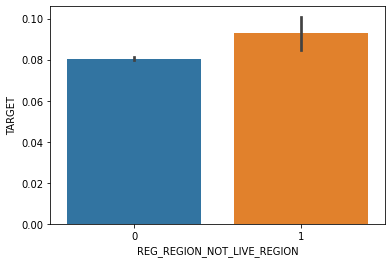

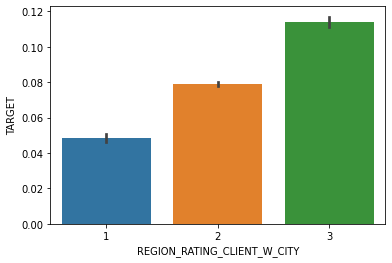

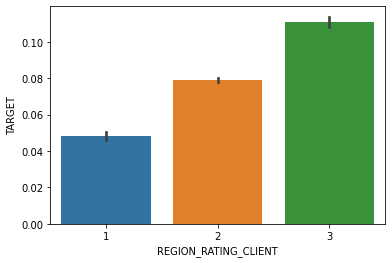

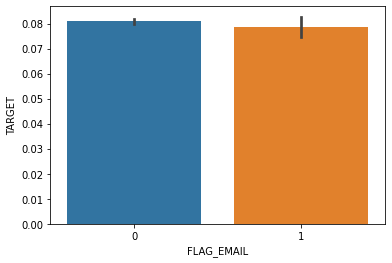

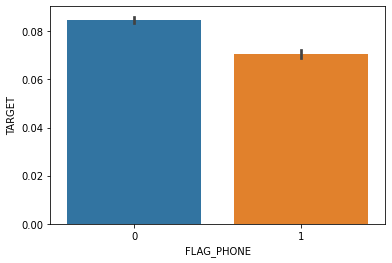

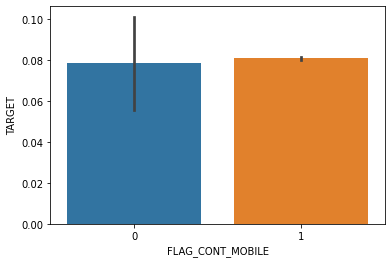

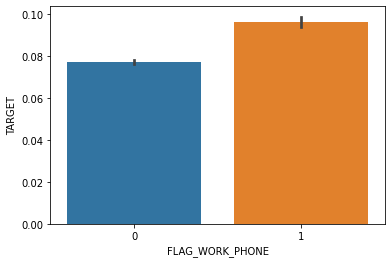

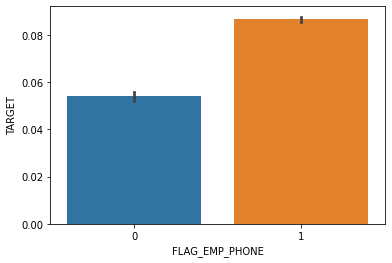

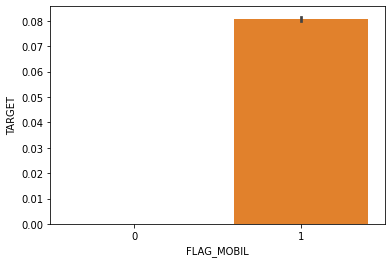

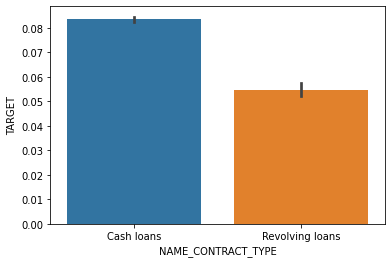

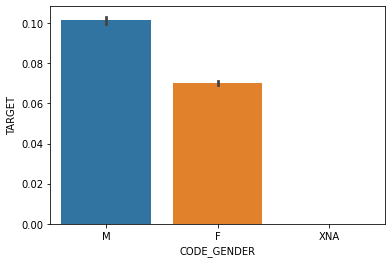

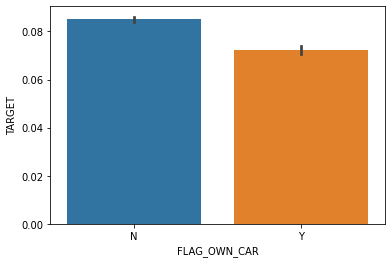

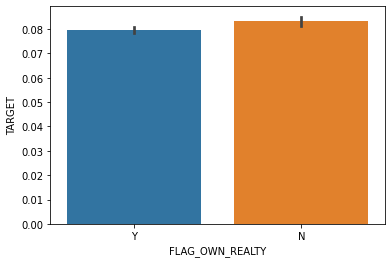

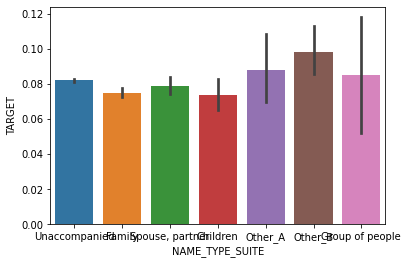

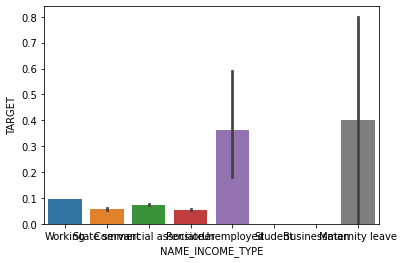

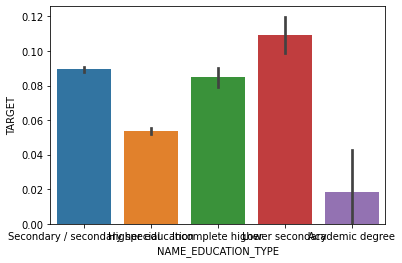

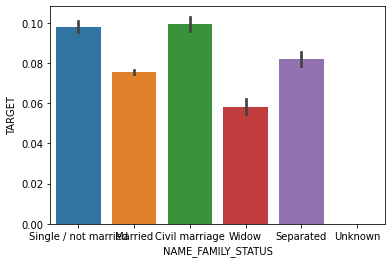

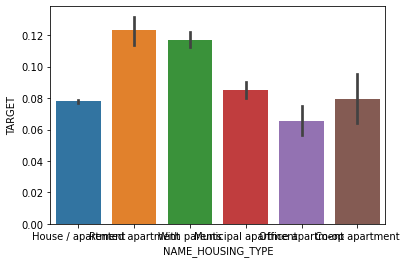

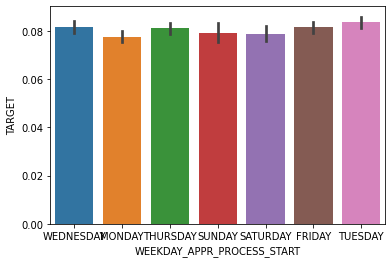

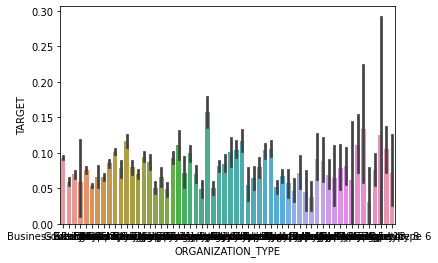

In [96]:
for col in char:
    plt.figure()
    sns.barplot(x = col, y = "TARGET", data = char_Y)

In [300]:
char.drop(['WEEKDAY_APPR_PROCESS_START','FLAG_OWN_REALTY','FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_DOCUMENT_5',
           'FLAG_DOCUMENT_20'], axis = 1, inplace = True)

In [301]:
char.columns

Index(['index', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_2', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMIL

In [302]:
char.head()

,index,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_DOCUMENT_21,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,2,3,0,0,1,1,Cash loans,F,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Municipal apartment,Other
1,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1,1,0,0,0,0,2,2,0,0,1,1,Cash loans,F,N,Unaccompanied,Working,Secondary / secondary special,Married,With parents,Business Entity Type 3
2,2,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,1,1,0,0,1,1,Cash loans,F,N,NaN,Commercial associate,Secondary / secondary special,Single / not married,With parents,Medicine
3,3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,2,2,0,0,1,1,Cash loans,M,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Self-employed
4,4,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,2,2,0,0,1,1,Cash loans,F,N,Unaccompanied,Working,Higher education,Civil marriage,Rented apartment,Bank


In [303]:
char.reset_index(inplace = True)
char.drop(['index'], axis = 1, inplace = True)

In [304]:
for col in char.columns:
    char[col].fillna(char[col].mode()[0], inplace = True)

In [305]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in char.columns:
    char[col] = pd.DataFrame(le.fit_transform(char[col]), columns = [col])

In [306]:
char.reset_index(inplace = True)

In [307]:
char

,index,level_0,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_DOCUMENT_21,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,0,0,1,6,7,4,0,2,33
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,6,7,4,1,5,5
2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,1,4,3,5,30
3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,6,7,4,1,1,42
4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,6,7,1,0,4,2
5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,6,1,1,1,1,5
6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,6,3,1,5,1,57
7,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,6,1,4,1,1,13
8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,6,1,1,3,5,5
9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,4,1,1,42


In [220]:
char.head()

,level_0,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_DOCUMENT_21,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,0,0,1,6,7,4,0,2,33
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,6,7,4,1,5,5
2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,1,4,3,5,30
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,6,7,4,1,1,42
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,6,7,1,0,4,2


In [308]:
char.drop(['level_0'], axis = 1, inplace = True)

In [309]:
char.head()
char.drop(['index'], axis = 1, inplace = True)

In [310]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num = pd.DataFrame(sc.fit_transform(num), columns = num.columns)

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
char = pd.DataFrame(sc.fit_transform(char), columns = char.columns)

In [312]:
data = pd.concat([num,char], axis = 1)

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,Y, test_size=0.3, random_state=42)

In [323]:
Y

,TARGET
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [324]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)

In [318]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

In [319]:
print(log_reg.score(X_train,Y_train))
print(log_reg.score(X_test, Y_test))

0.6488331957679898
0.6474056670375412


In [320]:
print(precision_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(roc_auc_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.6588839847331499
0.6474056670375412
0.6700420660045969
0.6464165271489333
              precision    recall  f1-score   support

           0       0.63      0.62      0.63     84823
           1       0.66      0.67      0.66     92236

    accuracy                           0.65    177059
   macro avg       0.65      0.65      0.65    177059
weighted avg       0.65      0.65      0.65    177059



In [321]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,Y_train)
Y_pred_rfc = rfc.predict(X_test)

In [322]:
print(precision_score(Y_test,Y_pred_rfc))
print(accuracy_score(Y_test,Y_pred_rfc))
print(recall_score(Y_test,Y_pred_rfc))
print(roc_auc_score(Y_test,Y_pred_rfc))
print(classification_report(Y_test,Y_pred_rfc))

0.9949389763567105
0.9971478433742424
0.9996096968645648
0.9970402680708239
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84823
           1       0.99      1.00      1.00     92236

    accuracy                           1.00    177059
   macro avg       1.00      1.00      1.00    177059
weighted avg       1.00      1.00      1.00    177059



In [326]:
print(rfc.score(X_train,Y_train))
rfc.score(X_test,Y_test)

1.0


0.9971478433742424